This Project is about building a Dog vs Cat classification system using Transfer Learning. Here we used the pre-trained model called MobileNet V2. Transfer Learning is an important concept in Deep Learning.

Transfer Learning gives higher accuracy compared to training moddel from scratch

![Siddhardhan - DL Project 3. Dog vs Cat Classification using Transfer Learning Deep Learning Projects in Python [pHq29zi4Gr0 - 1013x570 - 2m52s].png](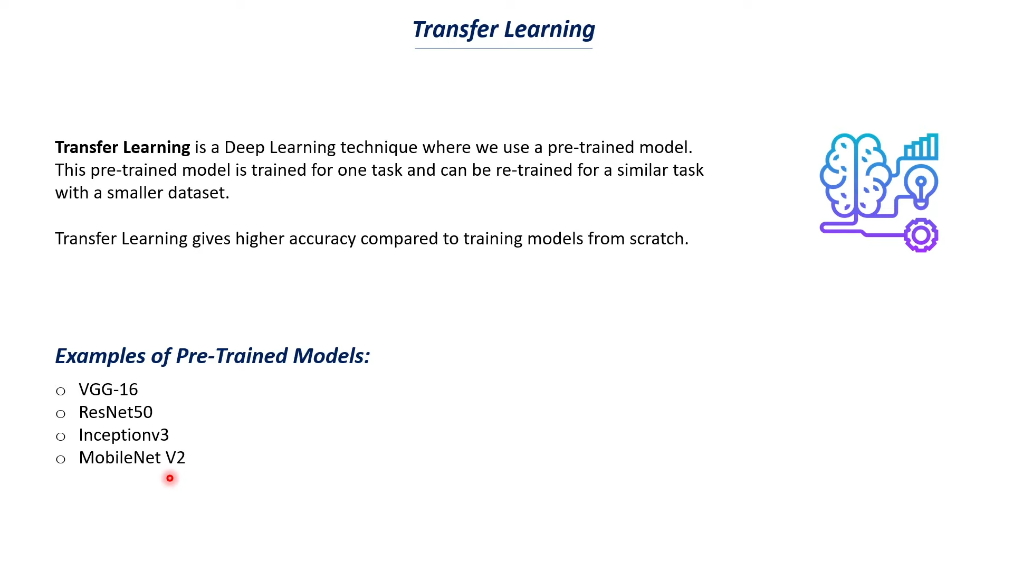)

![Siddhardhan - DL Project 3. Dog vs Cat Classification using Transfer Learning Deep Learning Projects in Python [pHq29zi4Gr0 - 743x418 - 4m25s].png](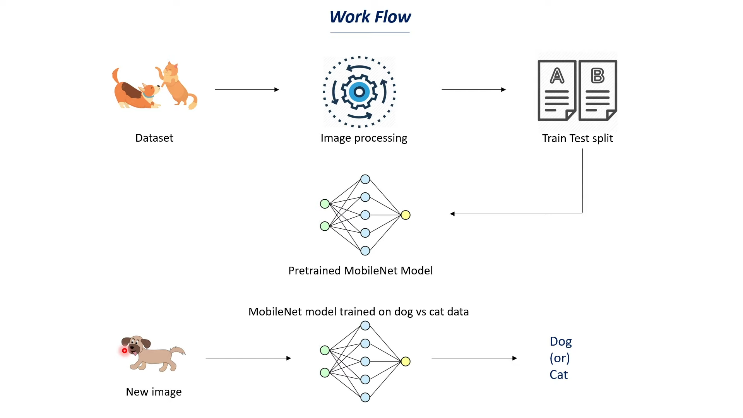)

In [2]:
!pip install kaggle

In [3]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# importing the dog vs cat dataset from kaggle

In [5]:
# kaggle api
!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:04<00:00, 170MB/s]
100% 812M/812M [00:04<00:00, 170MB/s]


In [6]:
# extracting the compressed dataset

from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset,'r') as zip:  # just file open thing
  zip.extractall()

print("The dataset is extracted")

The dataset is extracted


In [7]:
# extracting the compressed dataset

from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset,'r') as zip:  # just file open thing
  zip.extractall()

print("The dataset is extracted")

The dataset is extracted


In [8]:
import os
# counting the number of files/images in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print("number of images ",file_count)

number of images  25000


In [9]:
# printing the name of images

file_names = os.listdir('/content/train/')
print(file_names)

# dog and cat are present in the same follder(train)

['cat.8615.jpg', 'dog.10939.jpg', 'dog.3833.jpg', 'cat.5776.jpg', 'dog.11229.jpg', 'dog.9510.jpg', 'cat.8130.jpg', 'dog.42.jpg', 'cat.1925.jpg', 'dog.162.jpg', 'dog.11545.jpg', 'dog.7583.jpg', 'cat.9976.jpg', 'cat.11491.jpg', 'cat.664.jpg', 'cat.11009.jpg', 'cat.17.jpg', 'dog.12105.jpg', 'dog.6152.jpg', 'dog.123.jpg', 'cat.2675.jpg', 'cat.11870.jpg', 'dog.575.jpg', 'cat.5914.jpg', 'dog.6742.jpg', 'dog.9460.jpg', 'dog.10028.jpg', 'cat.11627.jpg', 'dog.4743.jpg', 'dog.2081.jpg', 'dog.1223.jpg', 'dog.8037.jpg', 'cat.174.jpg', 'dog.7438.jpg', 'cat.9648.jpg', 'cat.11819.jpg', 'dog.2343.jpg', 'cat.9692.jpg', 'cat.9796.jpg', 'cat.4963.jpg', 'cat.5789.jpg', 'dog.10914.jpg', 'dog.7664.jpg', 'dog.10451.jpg', 'cat.1353.jpg', 'dog.10738.jpg', 'cat.6060.jpg', 'cat.12208.jpg', 'cat.4326.jpg', 'dog.9151.jpg', 'cat.807.jpg', 'dog.2239.jpg', 'cat.6939.jpg', 'dog.10372.jpg', 'cat.5056.jpg', 'cat.12393.jpg', 'dog.1720.jpg', 'cat.6825.jpg', 'cat.10165.jpg', 'cat.12471.jpg', 'dog.7850.jpg', 'cat.9644.jpg',

Importing the dependencies

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats

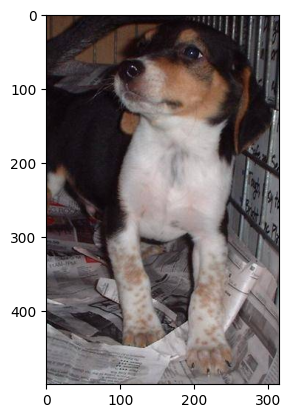

In [11]:
# displaying dog images

img = mpimg.imread('/content/train/dog.3833.jpg')
plt.imshow(img)


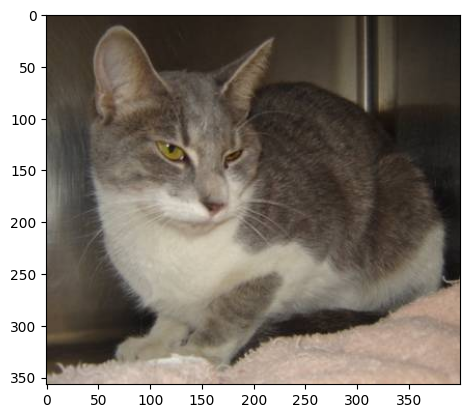

In [12]:
# displaying image of a cat
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

One thing is clear, images size are different in pixels. For training and testing the model, we should have some fixed size of image : first preprocessing tast.

Also cat and dog are differnt in shape, so color factor won't affect much, but still let's play with rgb, need not to convert in grayscale image

In [13]:
# common pixels sizes me badlna hai ab

import os

In [14]:
# resizing all the images, also 25000 images hain : use less 2000, transfer learning me esa hi krte hain

file_names = os.listdir('/content/train')

for i in range(5): # first 5 files will be printed
  # print(file_names[i])
  name = file_names[i]
  print(name[0:3])

cat
dog
dog
cat
dog


In [15]:
file_names = os.listdir('/content/train')

# calculating how many dog and how many cat images are there
dog_count=0
cat_count=0

for img_file in file_names:
  name = img_file[0:3] # first 3 letters
  if name == 'dog':
    dog_count+=1

  else :
    cat_count+=1

print("Number of dog images ",dog_count)
print("Number of cat images ",cat_count)


Number of dog images  12500
Number of cat images  12500


In [16]:
# exact 12 hajr 500 images
# we are going to take just 2000 or 3000 images not all

In [17]:
# creating a directory for resized images

In [18]:
os.mkdir('/content/image resized')

In [19]:
original_folder = '/content/train'
resized_folder = '/content/image resized'

for i in range(2000): # first 2000 image se model train krenge
  filename = os.listdir(original_folder)[i] # ek ek krke first 2000 image it will take their names
                                            #  os.listdir(original_folder) : this is like an array, actually a list
  img_path = original_folder + '/' + filename  # after addition/concatenation, it will be /content/train/dog.444.jpg ; original_folder variable is just  '/content/train' ; so '/' + 'filename' ko add krna must tha

  # below two lines are are just for open krke risize krna, open is compulsory to do modifications
  img = Image.open(img_path)
  img = img.resize((224,224))

  img = img.convert('RGB') # some images can be graystyle, just to get rid of that suspicion, actually rgb hi hain, kuch shayad rgb na hon, isliye ye line of code likhna pda

  # same as above ,  resized_folder = '/content/image resized' so '/' and 'image name' add krna must hai.
  # these below two lines are just to save that image; folder jisme image save krna hai + image name
  newImgPath = resized_folder+'/'+filename
  img.save(newImgPath)

  # it should be better to define those two paths at staring like this, usime / last me add kr do
#  original_folder = '/content/train/'
#  resized_folder = '/content/image resized/'
# so in that case +'/'+ extra add nhi krna padega, img_path = original_folder + filename , newImgPath = resized_folder+filename , as already folder variable name contains '/'

The code you provided appears to be Python code that performs the following tasks:

1. It creates a new directory called "image resized" under the `/content` directory using the `os.mkdir()` function.

2. It defines two variables:
   - `original_folder`, which specifies the directory where the original images are located.
   - `resized_folder`, which specifies the directory where the resized images will be saved.

3. It then enters a loop that iterates 2000 times. The purpose of this loop is to process the first 2000 images in the `original_folder`.

4. Within the loop, the code does the following for each iteration:
   - It constructs the filename of the current image by listing the files in the `original_folder` and selecting the `i`-th file.
   - It constructs the full path to the original image using the `original_folder` and the filename.
   - It opens the original image using the Python Imaging Library (PIL) with `Image.open()`.
   - It resizes the image to a size of 224x224 pixels using `img.resize((224, 224))`. This is a common size for images when working with deep learning models.
   - It converts the image to the RGB color mode using `img.convert('RGB')`. This is necessary because some images might be in different color modes, and converting to RGB ensures consistency.
   - It constructs the path where the resized image will be saved using `resized_folder` and the filename.
   - It saves the resized image to the specified path using `img.save(newImgPath)`.

Overall, this code is intended to resize and convert a specified number of images (the first 2000 images) from the `original_folder` to 224x224 pixels and save them in the "image resized" directory. This kind of preprocessing is common when preparing image data for machine learning or deep learning tasks.

In [20]:
# printing the name of images that have been resized

file_names = os.listdir('/content/image resized/')
print(file_names)

['cat.8615.jpg', 'dog.10939.jpg', 'dog.3833.jpg', 'cat.5776.jpg', 'dog.11229.jpg', 'dog.9510.jpg', 'cat.8130.jpg', 'dog.42.jpg', 'cat.1925.jpg', 'dog.162.jpg', 'dog.11545.jpg', 'dog.7583.jpg', 'cat.9976.jpg', 'cat.11491.jpg', 'cat.664.jpg', 'cat.11009.jpg', 'cat.17.jpg', 'dog.12105.jpg', 'dog.6152.jpg', 'dog.123.jpg', 'cat.2675.jpg', 'cat.11870.jpg', 'dog.575.jpg', 'cat.5914.jpg', 'dog.6742.jpg', 'dog.9460.jpg', 'dog.10028.jpg', 'cat.11627.jpg', 'dog.4743.jpg', 'dog.2081.jpg', 'dog.1223.jpg', 'dog.8037.jpg', 'cat.174.jpg', 'dog.7438.jpg', 'cat.9648.jpg', 'cat.11819.jpg', 'dog.2343.jpg', 'cat.9692.jpg', 'cat.9796.jpg', 'cat.4963.jpg', 'cat.5789.jpg', 'dog.10914.jpg', 'dog.7664.jpg', 'dog.10451.jpg', 'cat.1353.jpg', 'dog.10738.jpg', 'cat.6060.jpg', 'cat.12208.jpg', 'cat.4326.jpg', 'dog.9151.jpg', 'cat.807.jpg', 'dog.2239.jpg', 'cat.6939.jpg', 'dog.10372.jpg', 'cat.5056.jpg', 'cat.12393.jpg', 'dog.1720.jpg', 'cat.6825.jpg', 'cat.10165.jpg', 'cat.12471.jpg', 'dog.7850.jpg', 'cat.9644.jpg',

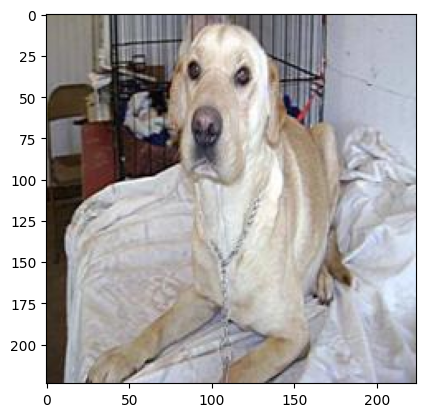

In [21]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.11229.jpg')
imgplt = plt.imshow(img)
plt.show()

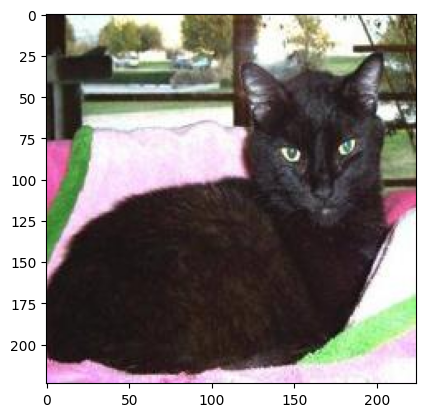

In [22]:
# displaying the resized cat image
img=mpimg.imread('/content/image resized/cat.8615.jpg')
plt.imshow(img)

Creating labels for resized images of dogs and cats

In [23]:
# creating a loop to assign labels

filenames = os.listdir('/content/image resized/')

labels = []

for i in range(2000):
  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else :
    labels.append(0)

In [24]:
print(filenames[0:5])
print(len(filenames))

['cat.8615.jpg', 'dog.10939.jpg', 'dog.3833.jpg', 'cat.5776.jpg', 'dog.11229.jpg']
2000


In [25]:
print(labels[0:5])
print(len(labels))

[0, 1, 1, 0, 1]
2000


In [26]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)
# so distribution is almost even, and are completely random, as it is clear by printing the first 5 labels

[0 1]
[ 978 1022]


Converting all the resized images to numpy arrays


In [27]:
import cv2
import glob

In [28]:
# Define the directory path where the images are located
image_directory = '/content/image resized/'   # copy krne se '/' nhi aata, khud se add kr do

# Define a list of image file extensions to search for
image_extension = ['png', 'jpg']

# Initialize an empty list to store the file paths of the images
files = []

# Find image files with specified extensions and append their paths to the 'files' list
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

# Read and load the images into a NumPy array using OpenCV (cv2)
dog_cat_images = np.asarray([cv2.imread(file) for file in files]) # files me upasthit sbhi images ko cv2.imread() ke dvara numpy me badlna


The provided code appears to perform the following tasks:

1. `image_directory = '/content/image resized/'`: This line defines the directory path where the images are located. The trailing '/' is added to ensure that the path ends with a slash for proper file path concatenation.

2. `image_extension = ['png', 'jpg']`: This line defines a list of image file extensions to search for within the specified directory. The code will look for files with '.png' and '.jpg' extensions.

3. `files = []`: This line initializes an empty list called `files` that will be used to store the file paths of the images found in the directory.

4. `[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]`: This line uses a list comprehension to **find image files in the specified `image_directory` with extensions specified in `image_extension`**. Here's a breakdown of what this line does:
   - `glob.glob(image_directory + '*.' + e)` generates a list of file paths that match the pattern `'image_directory/*.extension'` for each extension `e` in the `image_extension` list.
   - The `files.extend(...)` part appends the file paths found for each extension to the `files` list.

5. `dog_cat_images = np.asarray([cv2.imread(file) for file in files])`: This line reads the image files specified in the `files` list using the OpenCV (cv2) library and stores the resulting images as a NumPy array in the `dog_cat_images` variable. Each element of the array corresponds to an image file, and `cv2.imread(file)` is used to read and load each image from the file path.

In summary, this code scans the specified directory (`image_directory`) for image files with specific extensions ('.png' and '.jpg') and loads those images into a NumPy array (`dog_cat_images`) using the OpenCV library. The code effectively collects and prepares image data for further processing or analysis.

In [29]:
dog_cat_images # this is now numpy array
# all the pixels values it has

array([[[[ 25,  26,  36],
         [ 20,  21,  31],
         [ 20,  18,  30],
         ...,
         [ 39,  67,  68],
         [ 76, 104, 105],
         [ 52,  80,  80]],

        [[ 25,  26,  36],
         [ 20,  21,  31],
         [ 21,  19,  31],
         ...,
         [ 53,  81,  82],
         [ 87, 115, 116],
         [113, 144, 143]],

        [[ 25,  27,  37],
         [ 20,  22,  32],
         [ 19,  19,  31],
         ...,
         [ 58,  88,  89],
         [ 62,  92,  93],
         [116, 148, 147]],

        ...,

        [[255, 166, 236],
         [255, 167, 237],
         [255, 173, 243],
         ...,
         [255, 253, 255],
         [255, 253, 255],
         [255, 254, 255]],

        [[255, 168, 237],
         [255, 166, 235],
         [255, 170, 238],
         ...,
         [255, 252, 255],
         [255, 252, 255],
         [255, 253, 255]],

        [[255, 170, 239],
         [255, 166, 235],
         [253, 166, 234],
         ...,
         [255, 252, 255],
        

In [30]:
type(dog_cat_images)

numpy.ndarray

In [31]:
print(dog_cat_images.shape) # 2000 images, 224*224 pixels , 3 channels in each i.e. rgb images

(2000, 224, 224, 3)


In [32]:
X = dog_cat_images
Y = np.asarray(labels)

In [33]:
# train test split

x_train , x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=2) # no need to stratify=Y, as almost same and random destribution

In [34]:
print(X.shape, x_train.shape, x_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 -> training images

400 -> testing images

not a typical deep learning model. as deep = 100,000 kind of datapoints


In [46]:
# scaling the data
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [36]:
print(x_train_scaled)

[[[[0.36078431 0.35294118 0.37647059]
   [0.36078431 0.35294118 0.37647059]
   [0.35294118 0.34509804 0.36862745]
   ...
   [0.41568627 0.40392157 0.41176471]
   [0.42352941 0.41176471 0.41960784]
   [0.42745098 0.41568627 0.42352941]]

  [[0.36078431 0.35294118 0.37647059]
   [0.35686275 0.34901961 0.37254902]
   [0.35294118 0.34509804 0.36862745]
   ...
   [0.41960784 0.40784314 0.41568627]
   [0.41960784 0.40784314 0.41568627]
   [0.42352941 0.41176471 0.41960784]]

  [[0.36078431 0.35294118 0.37647059]
   [0.35686275 0.34901961 0.37254902]
   [0.35294118 0.34509804 0.36862745]
   ...
   [0.42352941 0.41176471 0.41960784]
   [0.41960784 0.40784314 0.41568627]
   [0.41960784 0.40784314 0.41568627]]

  ...

  [[0.45098039 0.44313725 0.44313725]
   [0.4627451  0.45490196 0.45490196]
   [0.47058824 0.4627451  0.4627451 ]
   ...
   [0.14117647 0.14901961 0.14901961]
   [0.10196078 0.10980392 0.10980392]
   [0.09803922 0.10588235 0.10588235]]

  [[0.43921569 0.43137255 0.43137255]
   [0.4

**BUILDING THE NEURAL NETWORK**

In [37]:
import tensorflow as tf
import tensorflow_hub as hub # to get pretrained model

In [39]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable = False)

In [40]:
num_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

# it is just model loading, training to krna abhi baki hai. Ye model means number of hidden layers, nodes, activation functions etc are already defined. We don't need to think of that things.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


The code snippet you provided appears to define a neural network model using Keras, a popular deep learning framework. This model is a sequential model with two layers. Let's break down the components of this model summary:

1. **Model Type**: "sequential" refers to the type of Keras model being used. A sequential model is a linear stack of layers, where you can add layers one by one, and the data flows through the layers sequentially.

2. **Layer 1: KerasLayer (keras_layer)**:
   - This is a KerasLayer, which indicates that this layer is using pre-trained weights from a model provided by TensorFlow Hub. It's a type of transfer learning where you can leverage pre-trained models for feature extraction.
   - The output shape of this layer is (None, 1280). The 'None' indicates that the batch size can vary.
   - The number of parameters for this layer is 2,257,984.

3. **Layer 2: Dense (dense)**:
   - This is a dense (fully connected) layer, which is typically used for making predictions or classifications.
   - The output shape of this layer is (None, 2), indicating that it produces a 2-dimensional output.
   - The number of parameters for this layer is 2,562.

In summary, this model consists of two layers:

- The first layer, "keras_layer," is based on a pre-trained model and extracts features, producing an output of shape (None, 1280).
- The second layer, "dense," is a dense layer used for classification and produces an output of shape (None, 2).

This architecture is commonly used for transfer learning. The features extracted by the pre-trained model (keras_layer) are passed to the dense layer for classification. The total number of parameters in the model is determined by the weights in the dense layer (2,562) and the weights in the pre-trained model (2,257,984).


In [41]:
model.compile(

      optimizer = 'adam',
      loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics = ['acc']
)

In [42]:
model.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 60s 1s/step - loss: 0.2193 - acc: 0.9081
Epoch 2/5
50/50 [==============================] - 56s 1s/step - loss: 0.0636 - acc: 0.9781
Epoch 3/5
50/50 [==============================] - 60s 1s/step - loss: 0.0453 - acc: 0.9900
Epoch 4/5
50/50 [==============================] - 49s 961ms/step - loss: 0.0354 - acc: 0.9931
Epoch 5/5
50/50 [==============================] - 48s 972ms/step - loss: 0.0292 - acc: 0.9944


In [43]:
# finally after 5 epochs, 99% accuracy : so nice : this is advantage of pretreained models


In [47]:
score, acc = model.evaluate(x_test_scaled,y_test)
print("Test Loss ",score)
print("Test Accuracy ",acc)

# almost 97% accuracy on test images prediction : so good

13/13 [==============================] - 14s 1s/step - loss: 0.0796 - acc: 0.9725
Test Loss  0.0795641541481018
Test Accuracy  0.9725000262260437


# Maing predictive Systems

Path of the image to be predicted /content/dog.jpg


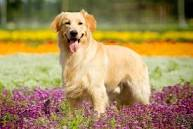

1/1 [==============================] - 0s 54ms/step
DOG


In [49]:
input_image_path = input('Path of the image to be predicted ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image,(224,224))

input_image_scaled = input_image_resize/225

input_reshaped = np.reshape(input_image_scaled,[1,224,224,3])

input_prediction = model.predict(input_reshaped)

input_pred_label = np.argmax(input_prediction) # to confidence values of both labels me se max will be picked

if(input_pred_label == 0) : print("CAT\n")
else : print("DOG")

# download images from internet and do the predictions

Path of the image to be predicted /content/cat.jpg


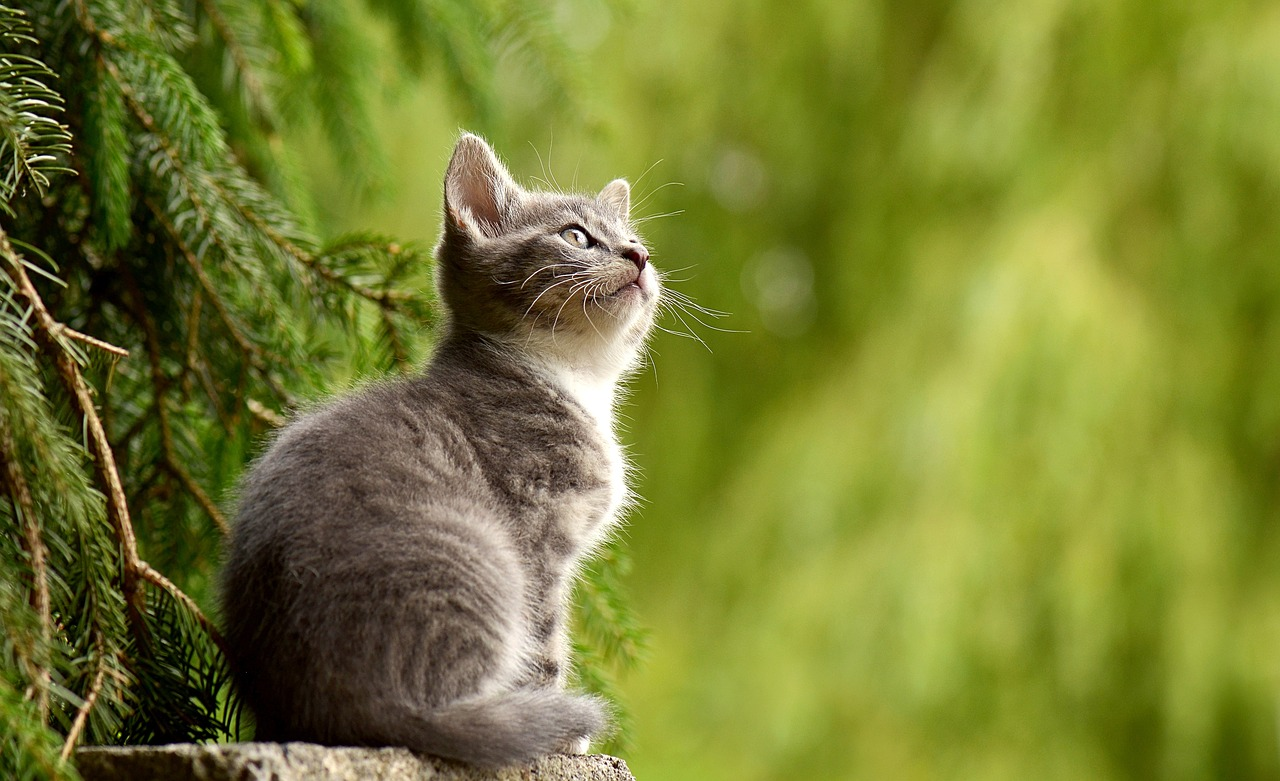

1/1 [==============================] - 0s 85ms/step
CAT



In [50]:
input_image_path = input('Path of the image to be predicted ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image,(224,224))

input_image_scaled = input_image_resize/225

input_reshaped = np.reshape(input_image_scaled,[1,224,224,3])

input_prediction = model.predict(input_reshaped)

input_pred_label = np.argmax(input_prediction)

if(input_pred_label == 0) : print("CAT\n")
else : print("DOG")

# download images from internet and do the predictions

# kaisi bhi image inteernet se download krlo, chalega, we are doing resize and reshape and rgp conversion, so model ko sahi cheej hi milegi